<a href="https://colab.research.google.com/github/PhillipTodorov/PhillipTodorov.GITHUB.IO/blob/master/new_york_city_airbnb_open_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

MessageError: ignored

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

In [0]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

In [0]:
os.getcwd()

'/content'

In [0]:
import os

os.listdir()

['.config',
 'kaggle.json',
 'newYorkCityData',
 'new-york-city-airbnb-open-data.zip',
 'LearnKeras',
 'sample_data']

In [0]:
os.makedirs('newYorkCityData')

FileExistsError: ignored

In [0]:
import zipfile
with zipfile.ZipFile("new-york-city-airbnb-open-data.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/newYorkCityData")

In [0]:
os.listdir('newYorkCityData/')

['AB_NYC_2019.csv', 'New_York_City_.png', 'new_csv.csv']

In [0]:
!head 'newYorkCityData/AB_NYC_2019.csv'

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,,,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.975,Entire home/apt,200,3,74,201

In [0]:
import pandas as pd

df = pd.read_csv('newYorkCityData/AB_NYC_2019.csv')

In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
df.to_csv('newYorkCityData/new_csv.csv', index=False, columns=['price', 'longitude'])

In [0]:
df2 = pd.read_csv('newYorkCityData/new_csv.csv')

In [0]:
df2.head()

,price,longitude
0,149,-73.97237
1,225,-73.98377
2,150,-73.94190
3,89,-73.95976
4,80,-73.94399


In [0]:
x = 'price'
y = 'longitude'

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(1, input_shape=(1,)))
model.compile(optimizers.Adam(lr=1), loss='mean_squared_error')


In [0]:
history = model.fit(df2[[x]], df2[[y]], epochs=20, batch_size=512)

Epoch 1/20
48895/48895 [==============================] - 0s 8us/step - loss: 26638.1823
Epoch 2/20
48895/48895 [==============================] - 0s 2us/step - loss: 849.3474
Epoch 3/20
48895/48895 [==============================] - 0s 2us/step - loss: 93.6596
Epoch 4/20
48895/48895 [==============================] - 0s 2us/step - loss: 14.5079
Epoch 5/20
48895/48895 [==============================] - 0s 2us/step - loss: 1.7691
Epoch 6/20
48895/48895 [==============================] - 0s 2us/step - loss: 0.0457
Epoch 7/20
48895/48895 [==============================] - 0s 2us/step - loss: 0.0264
Epoch 8/20
48895/48895 [==============================] - 0s 2us/step - loss: 0.0022
Epoch 9/20
48895/48895 [==============================] - 0s 2us/step - loss: 0.0137
Epoch 10/20
48895/48895 [==============================] - 0s 2us/step - loss: 0.0025
Epoch 11/20
48895/48895 [==============================] - 0s 2us/step - loss: 0.0099
Epoch 12/20
48895/48895 [==============================

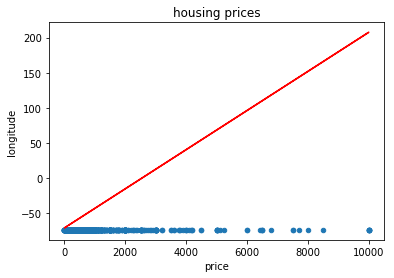

In [0]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x=x, y=y, title='housing prices')

y_pred = model.predict(df2[[x]].values)

plt.plot(df2[[x]], y_pred, color='red')


In [0]:
model.predict(2000)

AttributeError: ignored